In [5]:
!pip install tensorflow==2.9.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 96.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 85.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 134.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 130.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 71.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: tensor

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
from keras.initializers import glorot_uniform
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
import warningsm
warnings.filterwarnings(action='ignore')

In [4]:
tensorflow

<module 'tensorflow' from '/usr/local/lib/python3.10/dist-packages/tensorflow/__init__.py'>

In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile('/content/drive/MyDrive/archive2.zip','r')as obj1:
  obj1.extractall('/content/plant_images')

In [ ]:
image_path="/content/plant_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

In [ ]:
train_image_path=image_path
valid_image_path="/content/plant_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
test_image_path="/content/plant_images/test"

In [ ]:
class_names = os.listdir(image_path)
print(class_names)

['Tomato___Bacterial_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Cherry_(including_sour)___healthy', 'Apple___Black_rot', 'Grape___Black_rot', 'Tomato___healthy', 'Pepper,_bell___Bacterial_spot', 'Potato___Early_blight', 'Soybean___healthy', 'Raspberry___healthy', 'Pepper,_bell___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Strawberry___Leaf_scorch', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Apple___Apple_scab', 'Peach___Bacterial_spot', 'Grape___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Potato___Late_blight', 'Tomato___Target_Spot', 'Tomato___Late_blight', 'Squash___Powdery_mildew', 'Tomato___Septoria_leaf_spot', 'Peach___healthy', 'Tomato___Tomato_mosaic_virus', 'Corn_(maize)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Orange___Haunglongbing_(Citrus_greening)', 'Strawberry___healthy', 'Grape___Esca_(Black_Measles)', 'Apple___healthy', 'Blueberry___healthy', 'Tomato___Early_blight', 'Apple___Cedar_apple_rust', 'Grape___Leaf_blight

In [ ]:
from PIL import Image
def create_data_frame(path):
    list_plant=[]
    list_category=[]
    list_disease=[]
    list_path=[]
    list_plant_category=[]
    list_image_size=[]
    list_image_type=[]
    list_size=[]

    for path,directory,files in os.walk(path,topdown=False):
        for name in files:
            plant_category=category=path.split("/")[-1]
            plant=plant_category.split("___")[0]
            category=plant_category.split("___")[-1]
            disease=0 if category=="healthy" else 1
            full_path=path+"/"+name
            image_type=name.split(".")[1]
            size=os.path.getsize(full_path)
            with Image.open(full_path) as images:
                width,height=images.size
            list_plant.append(plant)
            list_category.append(category)
            list_disease.append(disease)
            list_path.append(full_path)
            list_plant_category.append(plant_category)
            list_image_size.append(str(width)+"x"+str(height))
            list_image_type.append(image_type)
            list_size.append(size)




    data_info=pd.DataFrame.from_dict({"Plant":list_plant,"Category":list_category,"Disease":list_disease,
                           "Path":list_path,"Plant_Category":list_plant_category,"Image_size":list_image_size,"Image_type":list_image_type,"Size":list_size},orient="columns")

    image_count_info=pd.DataFrame(data_info.groupby(["Plant","Category","Plant_Category"]).size())
    image_count_info.rename(columns={0:"nb"},inplace=True)
    image_count_info=image_count_info.reset_index()
    return data_info,image_count_info

train_data_info,train_data_count=create_data_frame(train_image_path)
valid_data_info,valid_data_count=create_data_frame(valid_image_path)

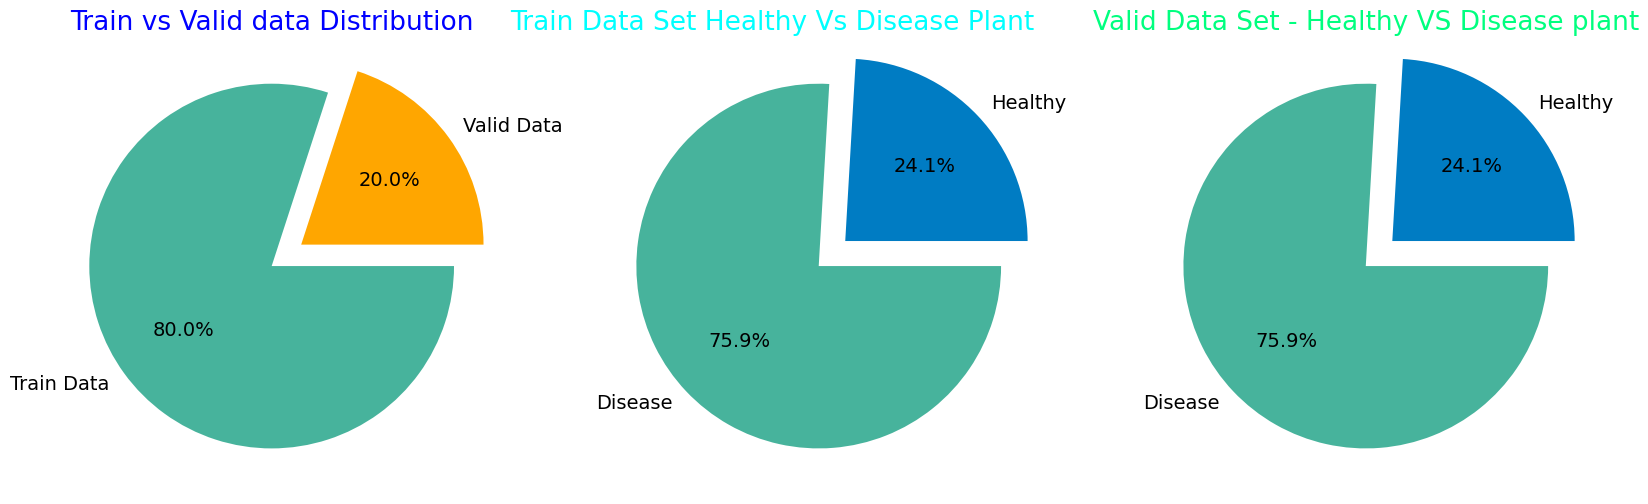

In [ ]:
def image_information(data_set_info):
    plt.rcParams["font.size"]=14
    plt.pie([data_set_info.nb[data_set_info.Category=="healthy"].sum(),data_set_info.nb[data_set_info.Category!="health"].sum()],labels=["Healthy","Disease"],autopct=lambda x:str(round(x,1))+"%",colors=["#007CC3","#47B39C"],shadow=False,explode=(0.20,0))


plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title("Train vs Valid data Distribution",fontsize=19,color="Blue")
plt.rcParams["font.size"]=14

# image_information(valid_data_count)
plt.pie([valid_data_count.nb.sum(),train_data_count.nb.sum()],labels=["Valid Data","Train Data"],autopct=lambda x: str(round(x,2))+"%",colors=["#FFA600","#47B39C"],shadow=False,explode=(0.20,0))
plt.subplot(1,3,2)
plt.title("Train Data Set Healthy Vs Disease Plant "        "          "  ,fontsize=19,color="aqua")
image_information(train_data_count)
plt.subplot(1,3,3)
plt.title('Valid Data Set - Healthy VS Disease plant', fontsize=19,color="springgreen")
image_information(valid_data_count)

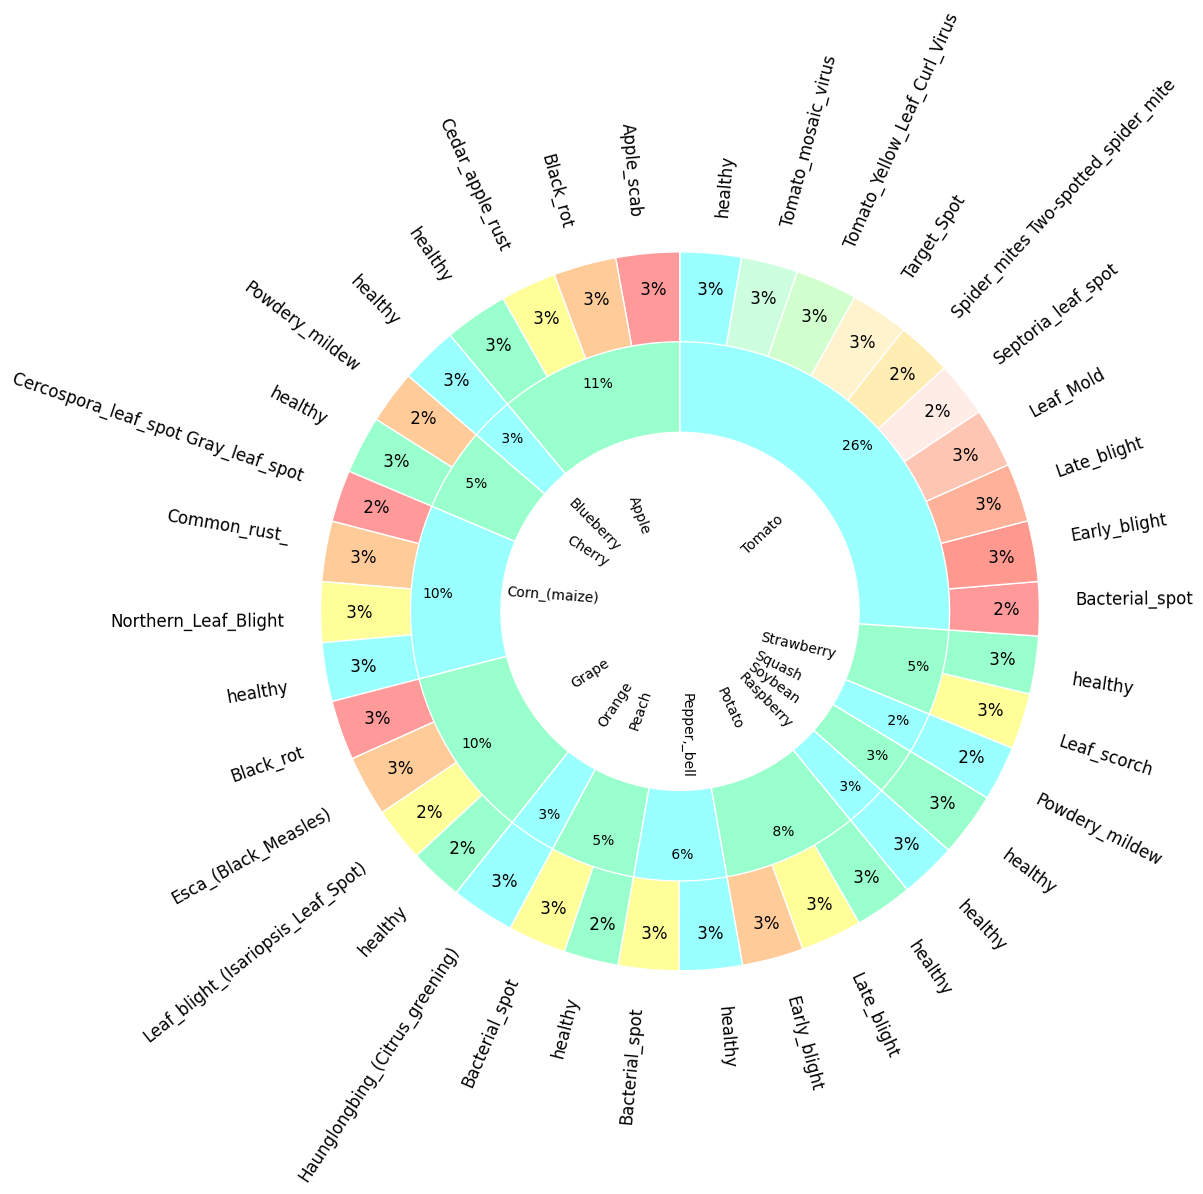

In [ ]:
def  class_data_distribution(class_data_count,class_data_info):
    list_plant_mod= ['Cherry' if x == 'Cherry_(including_sour)' else x for x in list(class_data_count.Plant.unique())]


    pi_chart_color_0 = ['#99ffcc', '#99ffff', '#99ffcc', '#99ffff','#99ffcc', '#99ffff','#99ffcc', '#99ffff','#99ffcc', '#99ffff','#99ffcc', '#99ffff','#99ffcc', '#99ffff',]
    pi_chart_color_1 = ['#ff999a','#ffcb99', '#fffe99','#99ffcc',
                                                                                                                 '#99ffff',
                                                                                                                 '#ffcb99', '#99ffcc',
                                                                                                                 '#ff999a','#ffcb99','#fffe99','#99ffff',
                                                                                                                 '#ff999a','#ffcb99','#fffe99','#99ffcc',
                                                                                                                 '#99ffff',
                                                                                                                 '#fffe99','#99ffcc',
                                                                                                                 '#fffe99','#99ffff',
                                                                                                                 '#ffcb99','#fffe99','#99ffcc',
                                                                                                                 '#99ffff',
                                                                                                                 '#99ffcc',
                                                                                                                 '#99ffff',
                                                                                                                 '#fffe99','#99ffcc',
                                                                                                                 '#ff999a','#ff9990','#ffb299','#ffc5b3','#ffece6','#ffedb3','#fff3cd','#d1ffcd','#cdffdf','#99ffff']


    plt.pie(class_data_count.nb, labels=class_data_count.Category,  startangle=90,frame=True,radius=1,rotatelabels=True,colors=pi_chart_color_1,wedgeprops=dict(width=0.9, edgecolor='w'),autopct='%2.f%%',pctdistance=0.90, textprops={'fontsize': 12})
    plt.pie(class_data_info.groupby(['Plant']).size(),labels=list_plant_mod,radius=0.75,startangle=90,labeldistance=0.3,rotatelabels=True,colors=pi_chart_color_0,wedgeprops=dict(width=0.9, edgecolor='w'),autopct='%2.f%%',pctdistance=0.90, textprops={'fontsize': 10})
    centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.axis('equal')
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(12,12))
class_data_distribution(train_data_count,train_data_info)

In [ ]:
data_dir = "/content/plant_images/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"

In [ ]:
diseases = os.listdir(train_dir)
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Tomato___Bacterial_spot,1702
Tomato___Spider_mites Two-spotted_spider_mite,1741
Cherry_(including_sour)___healthy,1826
Apple___Black_rot,1987
Grape___Black_rot,1888
Tomato___healthy,1926
"Pepper,_bell___Bacterial_spot",1913
Potato___Early_blight,1939
Soybean___healthy,2022
Raspberry___healthy,1781


Text(0.5, 1.0, 'Images per each class of plant disease')

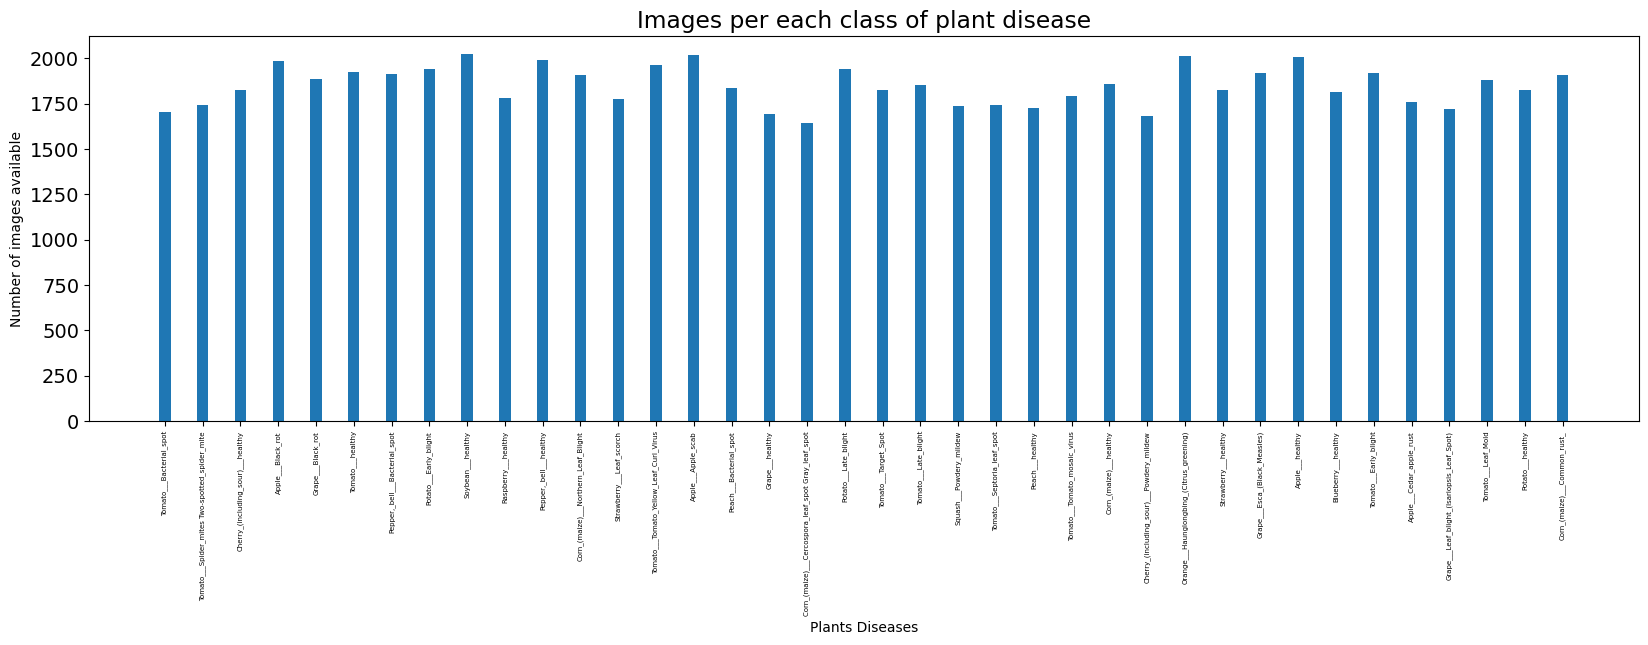

In [ ]:
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants Diseases', fontsize=10)
plt.ylabel('Number of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

In [ ]:
train_datagen= ImageDataGenerator(shear_range=0.2,zoom_range=0.2,horizontal_flip=False,vertical_flip=False,fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2)
val_datagen=ImageDataGenerator()

In [ ]:
train= train_datagen.flow_from_directory(train_dir,batch_size=128,target_size=(200,200),color_mode='rgb',class_mode='categorical',seed=42)
valid=val_datagen.flow_from_directory(valid_dir,batch_size=128,target_size=(200,200),color_mode='rgb',class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
classes=list(train.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train:
    for i in range(0,20):
        plt.subplot(5,5,i+1)
        plt.imshow(X_batch[i].astype(np.uint8))
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    plt.show()
    break

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
base_model_tf=ResNet50(include_top=False,weights='imagenet',input_shape=(200,200,3),classes=38)
base_model_tf.trainable=False
pt=Input(shape=(200,200,3))
func=tensorflow.cast(pt,tensorflow.float32)
x=preprocess_input(func)
model_resnet=base_model_tf(x,training=False)
model_resnet=GlobalAveragePooling2D()(model_resnet)
model_resnet=Dense(128,activation='relu')(model_resnet)
model_resnet=Dense(64,activation='relu')(model_resnet)
model_resnet=Dense(38,activation='softmax')(model_resnet)
Model_2=Model(inputs=pt,outputs=model_resnet)
Model_2.summary()
Model: "model_1"

94765736/94765736 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 tf.cast (TFOpLambda)        (None, 200, 200, 3)       0         
                                                                 
 tf.__operators__.getitem (  (None, 200, 200, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 200, 200, 3)       0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                              

In [ ]:
Model_2.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history=Model_2.fit(train,validation_data=valid,epochs=2,verbose=1,callbacks=[callback])

Epoch 1/2
550/550 [==============================] - 858s 2s/step - loss: 0.1614 - accuracy: 0.9479 - val_loss: 0.1559 - val_accuracy: 0.9473
Epoch 2/2
550/550 [==============================] - 847s 2s/step - loss: 0.1130 - accuracy: 0.9629 - val_loss: 0.0916 - val_accuracy: 0.9684


In [ ]:
history

In [ ]:
Model_2.save("Model_2.h5")

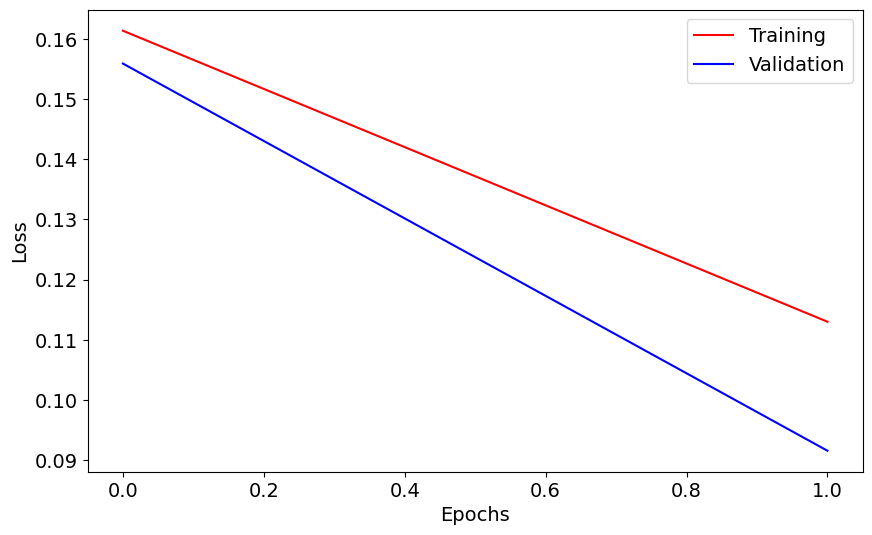

In [ ]:
import matplotlib.pyplot as plt
loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,val_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()



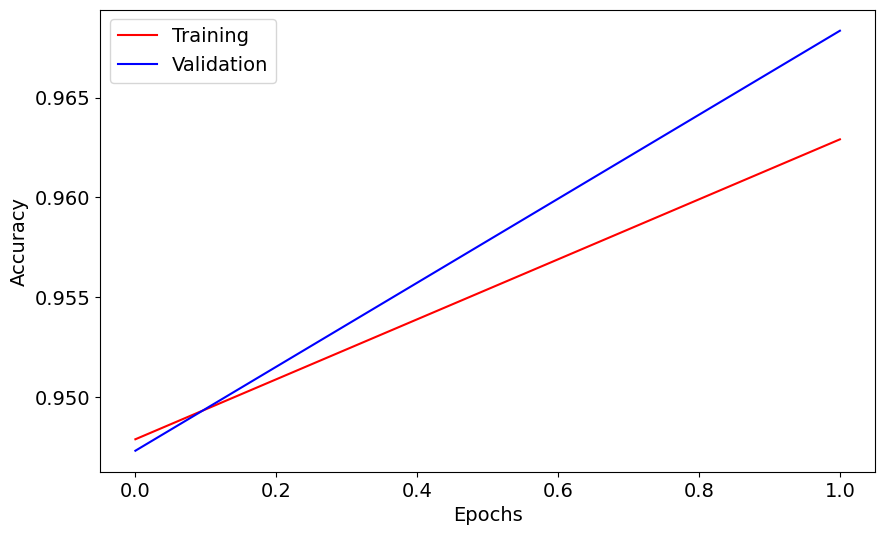

In [ ]:
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(10,6))
plt.plot(epochs,acc,c="red",label="Training")
plt.plot(epochs,val_acc,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
pip install watson_machine_learning_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.9/538.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 17.5 MB/s eta 0:00:00
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.13.2-py3-none-any.whl size=73905 sha256=107f832b7c16d42600c96755b4f1165f417761484a49103221410d93ac00d0e0
  Stored in directory: /root/.cache/pip/wheels/02/74/84/b23401241f593c7

In [ ]:
batch_size = 128
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(200, 200),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

Found 70295 images belonging to 38 classes.


In [ ]:
class_dict = training_set.class_indices
print(class_dict)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [ ]:
li = list(class_dict.keys())
print(li)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [ ]:
# pip install matplotlib

In [ ]:
from tensorflow.keras.models import load_model

# Load the model from the .h5 file
model = load_model("Model_2.h5")

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load your image
img_path = '/content/plant_images/test/test/TomatoEarlyBlight5.JPG'  # Replace with the actual path to your image
img = image.load_img(img_path, target_size=(200, 200))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
preprocessed_img = img_array  # No need for additional preprocessing since it's already preprocessed in training

In [ ]:
predictions = model.predict(preprocessed_img)
predicted_label_index = np.argmax(predictions)
predicted_label = li[predicted_label_index]

1/1 [==============================] - 0s 24ms/step


In [ ]:
predicted_label

'Tomato___Early_blight'